todo: all will be in the script (now trial stuff is in the script, and here I have full signal)

Calculate 5 versions of ACF:
* ACF on full signal
* iSTTC on full signal
* Pearsonr trial average
* STTC trial average
* STTC trial concat

We do not have ground truth here but we have the high quality units from neuropixels. The idea is to show that the STTC concat 
works better compared to the trial average methods (both Pearson and STTC).

Trial generation approach: for every continious signal the resampling procedure is run.

* Number of resampling iterations: M is based on bootstrapping stability analysis 
* Number of trials per resampling: N = 40 (based on data in monkey dataset so the number of trials is from experiments)


In [11]:
import csv
import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import acf
#from scipy.optimize import curve_fit, OptimizeWarning

#import warnings

import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
#os.chdir(os.path.abspath("C:\\Users\\ipoch\\Documents\\repos\\isttc\\scripts"))
from calculate_tau import fit_single_exp
from cfg_global import project_folder_path
from calculate_acf import acf_sttc, acf_pearsonr_trial_avg, acf_sttc_trial_avg, acf_sttc_trial_concat
os.chdir(current_wd)

In [5]:
dataset_folder = project_folder_path + 'results\\allen_mice\\dataset\\cut_30min\\'
fig_folder = project_folder_path + 'results\\allen_mice\\fig_draft_paper\\'

### Get data

In [6]:
acf_full_df_file = dataset_folder + 'binned\\acf\\acf_full_50ms_20lags_df.pkl'
acf_full_df = pd.read_pickle(acf_full_df_file)

acf_isttc_full_df_file = dataset_folder + 'non_binned\\acf\\acf_isttc_full_50ms_20lags_df.pkl'
acf_isttc_full_df = pd.read_pickle(acf_isttc_full_df_file)

In [ ]:
# csv_data_file = dataset_folder + 'cut_30min\\sua_list_constrained.csv'
# with open(csv_data_file, newline='') as f:
#     reader = csv.reader(f)
#     sua_list = list(reader)
# print(f'Loaded N units {len(sua_list)}')

# csv_binned_data_file = dataset_folder + 'cut_30min\\sua_list_constrained_binned_50ms.csv'
# with open(csv_binned_data_file, newline='') as f:
#     reader = csv.reader(f)
#     binned_sua_list = list(reader)
# print(f'Loaded N units {len(binned_sua_list)}')

### Calculate ACFs

In [13]:
fs = 30000 # raw neuropixels
n_lags = 20

bin_size = 50 * (fs / 1000)
sttc_dt = 49 * (fs / 1000)
signal_len = 30 * 60 * fs

acf_cols = ['acf_' + str(i) for i in range(n_lags+1)]
print('acf_cols {}'.format(acf_cols))

acf_cols ['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20']


In [ ]:
calc_acf_full = False
calc_isttc_full = False

In [ ]:
if calc_acf_full:
    acf_full_l = []
    unit_metadata_l = []  # To store values 0-7
    
    for unit_idx, unit in enumerate(binned_sua_list):
        if unit_idx % 100 == 0:
            print(f'Processing unit {unit_idx}')
        spike_train_binned_int = np.asarray([int(spike) for spike in unit[8:]])
        spike_train_binned_acf = acf(spike_train_binned_int, nlags=n_lags)
        acf_full_l.append(spike_train_binned_acf)
        unit_metadata_l.append(unit[:8])
    
    acf_full_df = pd.DataFrame(np.array(acf_full_l), columns=acf_cols)
    column_names = ["specimen_id", "session_id", "unit_id", "ecephys_structure_acronym", 'firing_rate', 'amplitude_cutoff', 'isi_violations', 'presence_ratio']
    metadata_df = pd.DataFrame(unit_metadata_l, columns=column_names)
    
    acf_full_df = pd.concat([metadata_df, acf_full_df], axis=1)
    
    print('NaNs in acf {}'.format(acf_full_df.isnull().any().any()))
    acf_full_df.head(3)
    
    acf_full_df.to_pickle(dataset_folder + 'cut_30min\\binned\\acf\\acf_full_50ms_20lags_df.pkl')

In [ ]:
if calc_isttc_full:
    acf_isttc_full_l = []
    unit_metadata_l = []  # To store values 0-7
    
    for unit_idx, unit in enumerate(sua_list):
        if unit_idx % 100 == 0:
            print(f'Processing unit {unit_idx}')
        spike_train_int = np.asarray([int(spike) for spike in unit[8:]])
        spike_train_acf = acf_sttc(spike_train_int, n_lags, bin_size, sttc_dt, signal_len, verbose_=False)
        acf_isttc_full_l.append(spike_train_acf)
        unit_metadata_l.append(unit[:8])
    
    acf_isttc_full_df = pd.DataFrame(np.array(acf_isttc_full_l), columns=acf_cols)
    column_names = ["specimen_id", "session_id", "unit_id", "ecephys_structure_acronym", 'firing_rate', 'amplitude_cutoff', 'isi_violations', 'presence_ratio']
    metadata_df = pd.DataFrame(unit_metadata_l, columns=column_names)
    
    acf_isttc_full_df = pd.concat([metadata_df, acf_isttc_full_df], axis=1)
    
    print('NaNs in acf {}'.format(acf_isttc_full_df.isnull().any().any()))
    acf_isttc_full_df.head(3)

    acf_isttc_full_df.to_pickle(dataset_folder + 'cut_30min\\non_binned\\acf\\acf_isttc_full_50ms_20lags_df.pkl')

### Plot ACF

In [24]:
color_acf_full = '#4783B4'
color_pearson_trail_avg = 'slategray' 
color_sttc_trail_avg =  '#E97451' #'chocolate' #'#D6A27A' # 'steelblue'
color_sttc_trail_concat = '#B94E48' # '#9E5345' #'sandybrown'

In [7]:
acf_full_df.head(2)

,specimen_id,session_id,unit_id,ecephys_structure_acronym,firing_rate,amplitude_cutoff,isi_violations,presence_ratio,acf_0,acf_1,...,acf_11,acf_12,acf_13,acf_14,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20
0,744912849,766640955,950913540,VISam,5.92483027278476,0.00495112650974547,0.157932742873785,0.99,1.0,0.167262,...,0.024160,0.022974,0.010709,0.015712,0.006084,0.006856,0.010183,0.001855,-0.001762,0.004576
1,744912849,766640955,950915005,VISam,4.54907168784514,0.00120262444599965,0.09607244219631,0.99,1.0,0.096286,...,0.203274,0.197223,0.196655,0.188776,0.186128,0.183310,0.184317,0.165894,0.175448,0.163099


In [16]:
acf_full_df_area = acf_full_df.query('ecephys_structure_acronym == "VISam"').copy()
pfdl_acf_2d = acf_full_df_area[acf_cols].values

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000]


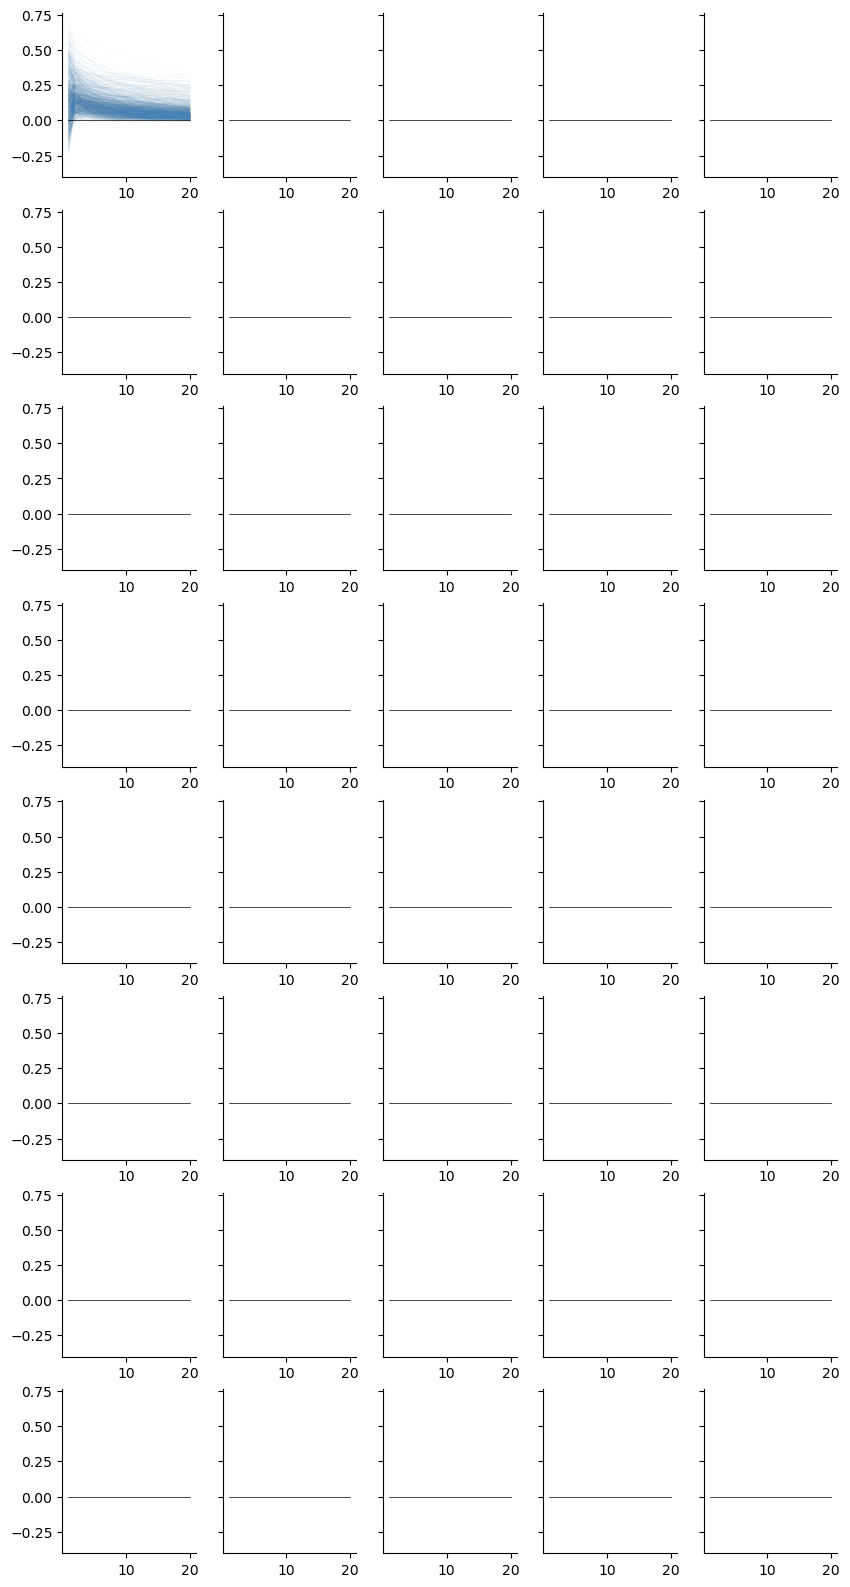

In [28]:
fig, axes = plt.subplots(8,5, figsize=(10,20), sharey=True)

t = np.linspace(1, n_lags, n_lags).astype(int)
t_labels = np.linspace(50, 1000, n_lags).astype(int)
print(t)
print(t_labels)

# pfdl_label = f"Pearson trial avg: {int(population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_ms'])} ms, CI [{int(
#     population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_lower_ms'])},{int(
#     population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_upper_ms'])}] \n (n={len(
#     pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
# axes[0,0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfdl']['popt']), color=color_pearson_trail_avg, label=pfdl_label)
for ii in range(pfdl_acf_2d.shape[0]):
    axes[0,0].plot(t, pfdl_acf_2d[ii, 1:], lw=0.5, color=color_acf_full, alpha=0.05)
#axes[0,0].set_title('PFdl, ' + pfdl_label, y=1.05)

for ax in axes.flat: 
    ax.plot(t, np.zeros(len(t)), lw=0.5, c='k')
    #ax.set_xticks(t)
    #ax.set_xticklabels(t_labels, rotation=90)
    #ax.set_xlabel('Time lag (ms)')
    #ax.set_ylabel('Autocorrelation (a.u.)')  

sns.despine()